# Data Exploration

## Imports

In [7]:
import json
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_data

In [2]:
with open("data/all_v2.json","r") as j_file:
    data = json.load(j_file)

train_dl, val_dl, test_dl, _ = load_data(data, batch_sizes=(30, 30, 20))
train_data, val_data, test_data = _


        train: 46431
        val: 9949
        test: 9951
        


In [3]:
counts = [[item['patient_id'], item['label'], len(item['encounters'])] for item in train_data]

df = pd.DataFrame(counts, columns=['patient_id', 'label', 'num_encounters'])
df

,patient_id,label,num_encounters
0,c41321db-61bf-188a-7336-e74897c037fb,False,798
1,843a93ff-26df-170f-b374-43cc1176b35a,False,42
2,0355144b-6af0-53ab-0d17-68d9e4a0f2ba,False,25
3,b3bf889a-6f89-68be-520a-53662f6aa2d1,True,38
4,927a2d26-a87c-b165-1d64-550d145ce647,False,20
...,...,...,...
46426,3cb972f3-96ce-11ce-3ecc-86ba5d4a6569,False,62
46427,520aae68-0887-1381-2422-c494a94c9101,False,99
46428,09e5ef00-20e8-9761-c672-6fc76d8cbbe7,False,30
46429,8edc1123-aeda-7c6f-7c5f-9b9f49056e12,False,40


In [5]:
df_true = df[df['label'] == True]

# Group by patient_id and get the row with the maximum number of encounters
num_encounters = df_true.loc[df_true.groupby('patient_id')['num_encounters'].idxmax()]

# Display the result
print(num_encounters)

                                 patient_id  label  num_encounters
39836  000f8736-804a-f4d0-a149-1fbe9cb9eb54   True             147
35809  00134bc4-34ae-3f6f-31d5-2092d173e799   True              22
17130  00198c87-e5bf-3315-f2df-452808829cbc   True              39
14864  0019c6ca-67ba-050e-9bf8-530668860f2e   True              14
35033  001cd51f-938f-24cb-714e-6be2cf0db894   True              25
...                                     ...    ...             ...
29154  ffbe3ec0-976c-a03d-7fe7-ec3235817116   True             219
40209  ffc58033-06d0-8233-d13b-3010929852b4   True             381
28933  ffd05748-68ba-2dd6-40f2-3d9a28c3ef83   True              23
12771  fff7932b-6954-1789-c7a0-a67df8e25420   True              43
19040  fff8725e-53df-c967-c35a-b40c5f0c248e   True              32

[5756 rows x 3 columns]


### Num encounters per patient

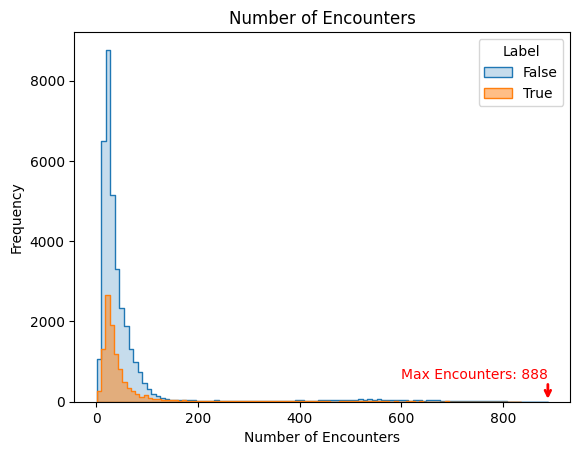

In [8]:
# sns.histplot(data=df, x='num_encounters', hue='label', element='step', bins=100, palette='pastel')\
sns.histplot(data=df[df['label'] == False], x='num_encounters', label='False', element='step', bins=100, alpha=0.25)
# Plot for label=True with custom opacity
sns.histplot(data=df[df['label'] == True], x='num_encounters', label='True', element='step', bins=100, alpha=0.5)

plt.title('Number of Encounters')
plt.xlabel('Number of Encounters')
plt.ylabel('Frequency')
plt.legend(title='Label')

max_encounters = df['num_encounters'].max()

text_x = max_encounters
text_y = 500
# Add text to the plot
plt.text(x=max_encounters, y=text_y, s=f'Max Encounters: {max_encounters}', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.annotate('', xy=(max_encounters, 0), xytext=(text_x, text_y), arrowprops=dict(arrowstyle='->', lw=2, color='red'))

plt.show()

# Num encounters

<Axes: xlabel='num_encounters', ylabel='Count'>

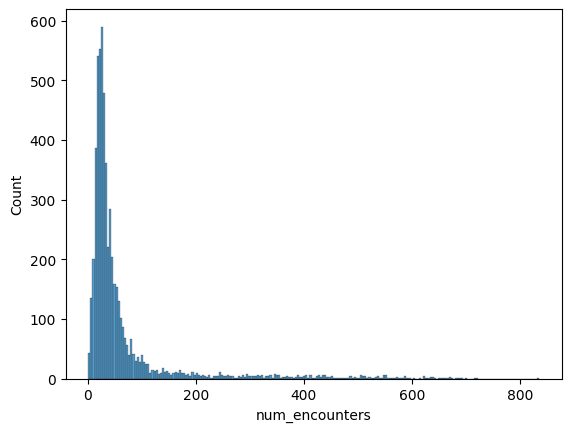

In [9]:
unique_true = df_true.loc[df_true.groupby('patient_id')['num_encounters'].idxmax()]

sns.histplot(data=unique_true, x='num_encounters')

### Num Chest X-rays per Patient (with chest x-ray)

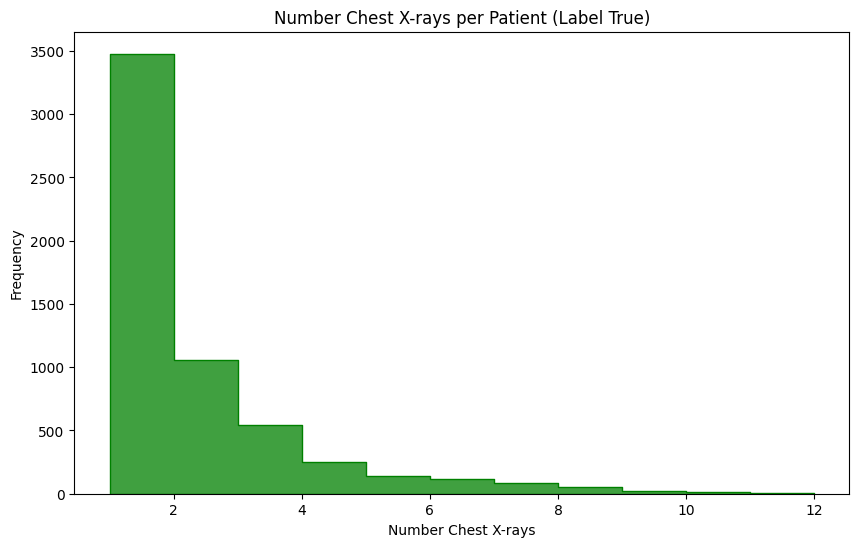

In [11]:
# Filter the DataFrame to only include rows where the label is True
df_true = df[df['label'] == True]

# Group by patient_id and count the number of rows for each patient
df_grouped = df_true.groupby('patient_id').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df_grouped, x='counts', binwidth=1, color='green', element='step', bins=20)
plt.title('Number Chest X-rays per Patient (Label True)')
plt.xlabel('Number Chest X-rays')
plt.ylabel('Frequency')
plt.show()